# Preface
Here, we will be improving architecture developed in Assignment-4 (Repo- Project-4) using below steps
* Change the Project(Assignment)-4th Code from Assignment 4 to include:

    a. image normalization <br/>
    b. L2 regularization <br/>
    c. ReLU after BN

* Run your new code for 40 epochs and save the model with highest validation accuracy
* Find out 25 misclassified images from the validation dataset and create an image gallery

<hr>

###Recap on what we did in Assignment-4

So far we have did these many major improvements: 

**1) Vanilla Architecture**

*   Maxpooling
*   1x1 Kernel
*   Relu activation

**2) Major focus on parameter reduction keeping the accuracy not to dip much**

*   Reduce the no: of layers
<br/><pre>Shift our architecture from deep to shallow. Once image reaches 9*9 resolution, then further layers can't extract any useful feature
       Eg: 3x3 kernel on 9x9 image only covers 25 pixels 9 times.</pre>
*   Reduce no: of kernels 
<br/><pre>Our objective is to detect handwritten digit in 15k max params. Using enough kernels to achieve.</pre>
*   Increase Epoch & Batch size
<br/><pre>Network takes more time to learn as few parameters have to be tuned properly for a broader spectrum. So we have to increase epoch and to utilize gpu cores more, increasing batchsize as well.</pre>

**3) Focused on resolving overfitting**

* BatchNormalization
* Drop-out

***We will focus on learning rate in this iteration for the faster convergence of parameter values***<br/>
**4) Learning rate**
* Cyclic Learning rate

# **Import Libraries and modules**

In [0]:
# Installing Keras Library and importing the same.
# Reference: https://keras.io/
!pip install -q keras
import keras

In [0]:
# Numpy is library used for efficient high level mathemtical processing on multi dimensional arrays
import numpy as np

# Keras provides a Sequential model API. This is way of creating a linear stack of layers while creating models.
from keras.models import Sequential

# Flatten provided by Keras will be used to convert a multidimensional tensor into a single 1-D tensor
from keras.layers import Flatten
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization

# Convolution2D will be used to create a convolution kernel that is convolved with the layer input to produce a tensor of outputs
from keras.layers import Convolution2D, MaxPooling2D

# Import np_utils from keras
from keras.utils import np_utils

# Being a subset of NIST, MNIST has datasets of handwritten digits with 60,000 training set and 10,000 test set
from keras.datasets import mnist

from keras import regularizers

# Load pre-shuffled MNIST data into train and test sets

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Loads MINST dataset, 60,000 training set and 10,000 test set
# X values will have images,  y values will have digit represented by the corresponding X images
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


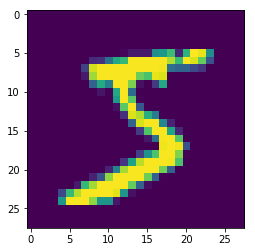

In [42]:
# Let's see a random image in a training dataset (X_train)

print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
# As you see above dimensions, loaded training dataset has a dimension of 2d. So, we have 60,000 2d images 28x28
# Let's reshapte to 3D as our model requires 3d images. Here, we are reshaping 28x28 to 28x28x1 where 1 being the channel of the image
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
# Using a 32 bit precision is a common approach in neural network training.
# Reason behind is that to make sure that the dataset fits easily in RAM.
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# 255 is the max pixel value in an image. Dividing all pixel values by 255 ensures that the input features are scaled between 0.0 and 1.0
# Reason behind to scale between 0.0 and 1.0 is to make sure default learning rate works well.
X_train /= 255
X_test /= 255

In [45]:
# Let's see corresponding y_train value
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
# Reason behind this conversion is, at the end of the model we will be having 10 nodes which will tell, out of 0-9 digits which does the input image represent.
# Hence to learn as well as to evaluate, we need a 10 length array for each output label
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [47]:
# Let's see what are the initial 10 values in y_train. Values is y_train corresponds to the digit represnted by x dataset images.
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

# Model Architecture

In [48]:
# Initializing Sequential API as we will be creating model in a linear stack way
model = Sequential()



# Input Dimension  = 28x28x1
# Kernel           = 3x3x1
# No:of Kernels    = 16
# Output Dimension = 26x26x16 (Here,16 is the number of channels)
# Receptive Field  = 3x3  
model.add(Convolution2D(13, 3, 3, input_shape=(28,28,1), kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

# Input Dimension  = 26x26x16
# Kernel           = 3x3x16
# No:of Kernels    = 16
# Output Dimension = 24x24x16 (Here,16 is the number of channels)
# Receptive Field  = 5x5 
model.add(Convolution2D(16, 3, 3, kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

# Input Dimension  = 24x24x16
# Kernel           = 3x3x16
# No:of Kernels    = 32
# Output Dimension = 22x22x32 (Here,32 is the number of channels)
# Receptive Field  = 7x7 
model.add(Convolution2D(19, 3, 3, kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(13, 1, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
# Input Dimension  = 22x22x16
# Maxpooling Dimension = 2x2 (Default is 2x2)
# Output Dimension = 11x11x16 (Here,16 is the number of channels)
# Receptive Field  = 14x14 
# NOTE: Maxpooling halves the resolution and doubles the receptive field
model.add(MaxPooling2D())



# Input Dimension  = 11x11x16
# Kernel           = 3x3x16
# No:of Kernels    = 16
# Output Dimension = 9x9x16 (Here,32 is the number of channels)
# Receptive Field  = 16x16 
model.add(Convolution2D(16, 3, 3, kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))





# # Input Dimension  = 7x7x32
# # Kernel           = 1x1x32
# # No:of Kernels    = 10
# # Output Dimension = 7x7x10 (Here,10 is the number of channels)
# # Receptive Field  = 18x18
# # NOTE: 1x1 Kernels are used here for dimension(channel) reduction.
# # No effect on output resolution or receptive field
model.add(Convolution2D(19, 3, 3, kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))




# Input Dimension  = 7x7x10
# Kernel           = 7x7x10
# No:of Kernels    = 10
# Output Dimension = 1x1x10 (Here,32 is the number of channels)
# Receptive Field  = 20x20 
model.add(Convolution2D(10, 1, kernel_regularizer=regularizers.l2(0.001)))
model.add(Convolution2D(10, 7, kernel_regularizer=regularizers.l2(0.001)))

# Input Dimension  = 1x1x10
# Output Dimension = 10
model.add(Flatten())

# We use a “softmax” activation function in the output layer. 
# This is to ensure the output values are in the range of 0 and 1 and used as predicted probabilities.
model.add(Activation('softmax'))







/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(13, (3, 3), input_shape=(28, 28, 1..., kernel_regularizer=<keras.reg...)`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(19, (3, 3), kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:66: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(19, (3, 3), kernel_regularizer=<keras.reg...)`


In [49]:
# Let's see the overview of stacked up layers in the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 13)        130       
_________________________________________________________________
batch_normalization_11 (Batc (None, 26, 26, 13)        52        
_________________________________________________________________
activation_13 (Activation)   (None, 26, 26, 13)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 26, 26, 13)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 16)        1888      
_________________________________________________________________
batch_normalization_12 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
activation_14 (Activation)   (None, 24, 24, 16)        0         
__________

# Cyclic Learning Rate

In [0]:
from keras.callbacks import *

class CyclicLR(Callback):
    """This callback implements a cyclical learning rate policy (CLR).
    The method cycles the learning rate between two boundaries with
    some constant frequency, as detailed in this paper (https://arxiv.org/abs/1506.01186).
    The amplitude of the cycle can be scaled on a per-iteration or 
    per-cycle basis.
    This class has three built-in policies, as put forth in the paper.
    "triangular":
        A basic triangular cycle w/ no amplitude scaling.
    "triangular2":
        A basic triangular cycle that scales initial amplitude by half each cycle.
    "exp_range":
        A cycle that scales initial amplitude by gamma**(cycle iterations) at each 
        cycle iteration.
    For more detail, please see paper.
    
    # Example
        ```python
            clr = CyclicLR(base_lr=0.001, max_lr=0.006,
                                step_size=2000., mode='triangular')
            model.fit(X_train, Y_train, callbacks=[clr])
        ```
    
    Class also supports custom scaling functions:
        ```python
            clr_fn = lambda x: 0.5*(1+np.sin(x*np.pi/2.))
            clr = CyclicLR(base_lr=0.001, max_lr=0.006,
                                step_size=2000., scale_fn=clr_fn,
                                scale_mode='cycle')
            model.fit(X_train, Y_train, callbacks=[clr])
        ```    
    # Arguments
        base_lr: initial learning rate which is the
            lower boundary in the cycle.
        max_lr: upper boundary in the cycle. Functionally,
            it defines the cycle amplitude (max_lr - base_lr).
            The lr at any cycle is the sum of base_lr
            and some scaling of the amplitude; therefore 
            max_lr may not actually be reached depending on
            scaling function.
        step_size: number of training iterations per
            half cycle. Authors suggest setting step_size
            2-8 x training iterations in epoch.
        mode: one of {triangular, triangular2, exp_range}.
            Default 'triangular'.
            Values correspond to policies detailed above.
            If scale_fn is not None, this argument is ignored.
        gamma: constant in 'exp_range' scaling function:
            gamma**(cycle iterations)
        scale_fn: Custom scaling policy defined by a single
            argument lambda function, where 
            0 <= scale_fn(x) <= 1 for all x >= 0.
            mode paramater is ignored 
        scale_mode: {'cycle', 'iterations'}.
            Defines whether scale_fn is evaluated on 
            cycle number or cycle iterations (training
            iterations since start of cycle). Default is 'cycle'.
    """

    def __init__(self, base_lr=0.001, max_lr=0.006, step_size=2000., mode='triangular',
                 gamma=1., scale_fn=None, scale_mode='cycle'):
        super(CyclicLR, self).__init__()

        self.base_lr = base_lr
        self.max_lr = max_lr
        self.step_size = step_size
        self.mode = mode
        self.gamma = gamma
        if scale_fn == None:
            if self.mode == 'triangular':
                self.scale_fn = lambda x: 1.
                self.scale_mode = 'cycle'
            elif self.mode == 'triangular2':
                self.scale_fn = lambda x: 1/(2.**(x-1))
                self.scale_mode = 'cycle'
            elif self.mode == 'exp_range':
                self.scale_fn = lambda x: gamma**(x)
                self.scale_mode = 'iterations'
        else:
            self.scale_fn = scale_fn
            self.scale_mode = scale_mode
        self.clr_iterations = 0.
        self.trn_iterations = 0.
        self.history = {}

        self._reset()

    def _reset(self, new_base_lr=None, new_max_lr=None,
               new_step_size=None):
        """Resets cycle iterations.
        Optional boundary/step size adjustment.
        """
        if new_base_lr != None:
            self.base_lr = new_base_lr
        if new_max_lr != None:
            self.max_lr = new_max_lr
        if new_step_size != None:
            self.step_size = new_step_size
        self.clr_iterations = 0.
        
    def clr(self):
        cycle = np.floor(1+self.clr_iterations/(2*self.step_size))
        x = np.abs(self.clr_iterations/self.step_size - 2*cycle + 1)
        if self.scale_mode == 'cycle':
            return self.base_lr + (self.max_lr-self.base_lr)*np.maximum(0, (1-x))*self.scale_fn(cycle)
        else:
            return self.base_lr + (self.max_lr-self.base_lr)*np.maximum(0, (1-x))*self.scale_fn(self.clr_iterations)
        
    def on_train_begin(self, logs={}):
        logs = logs or {}

        if self.clr_iterations == 0:
            K.set_value(self.model.optimizer.lr, self.base_lr)
        else:
            K.set_value(self.model.optimizer.lr, self.clr())        
            
    def on_batch_end(self, epoch, logs=None):
        
        logs = logs or {}
        self.trn_iterations += 1
        self.clr_iterations += 1

        self.history.setdefault('lr', []).append(K.get_value(self.model.optimizer.lr))
        self.history.setdefault('iterations', []).append(self.trn_iterations)

        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
        
        K.set_value(self.model.optimizer.lr, self.clr())

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
train_iterator = datagen.flow(X_train,Y_train, batch_size=168)
val_iterator = datagen.flow(X_test,Y_test)

# Model Training & Prediction

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
# Model Checkpoint which will be used as callback parameter value for saving the model weights
# whenever there is an improvement in validation accuracy
from keras.callbacks import ModelCheckpoint
filepath = r'/content/drive/My Drive/EVA-MachineLearning/Assignment-5-model_weights.hdf5'
checkpoint = ModelCheckpoint(filepath,
                            monitor='val_acc',
                            verbose=1,
                            save_best_only=True,
                            mode='max', period=1)

**40 Epochs**

In [54]:
# Introducing learning rate
from keras.callbacks import *
clr_triangular = CyclicLR(mode='triangular')

model.fit_generator(train_iterator, steps_per_epoch=len(train_iterator), nb_epoch=40, verbose=1, callbacks=[clr_triangular, checkpoint], validation_data=val_iterator, validation_steps=len(val_iterator))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=358, verbose=1, callbacks=[<__main__..., validation_data=<keras_pre..., validation_steps=313, epochs=40)`
  after removing the cwd from sys.path.


Epoch 1/40


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:699: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:707: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


358/358 [==============================] - 8s 23ms/step - loss: 0.3994 - acc: 0.9048 - val_loss: 0.2211 - val_acc: 0.9592

Epoch 00001: val_acc improved from -inf to 0.95920, saving model to /content/drive/My Drive/EVA-MachineLearning/Assignment-5-model_weights.hdf5
Epoch 2/40
358/358 [==============================] - 7s 20ms/step - loss: 0.1605 - acc: 0.9763 - val_loss: 0.1557 - val_acc: 0.9736

Epoch 00002: val_acc improved from 0.95920 to 0.97360, saving model to /content/drive/My Drive/EVA-MachineLearning/Assignment-5-model_weights.hdf5
Epoch 3/40
358/358 [==============================] - 7s 20ms/step - loss: 0.1289 - acc: 0.9800 - val_loss: 0.1070 - val_acc: 0.9839

Epoch 00003: val_acc improved from 0.97360 to 0.98390, saving model to /content/drive/My Drive/EVA-MachineLearning/Assignment-5-model_weights.hdf5
Epoch 4/40
358/358 [==============================] - 7s 20ms/step - loss: 0.1168 - acc: 0.9809 - val_loss: 0.0952 - val_acc: 0.9860

Epoch 00004: val_acc improved from 0.

In [0]:
#Load the best tuned model weight
model.load_weights(filepath)

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [57]:
print(score)

[0.06300641231536865, 0.9915]


In [0]:
y_pred = model.predict(X_test)

In [59]:
print(y_pred[:9])
print(y_test[:9])

[[2.12374331e-07 1.02809270e-06 3.97540534e-05 2.46890227e-06
  8.65937366e-09 1.88222870e-07 1.37979614e-10 9.99944210e-01
  1.05556374e-07 1.19036840e-05]
 [6.45567896e-04 9.48008848e-04 9.97760534e-01 3.15521436e-04
  9.75173043e-06 5.73568286e-08 2.85340619e-04 4.84390148e-06
  2.98449322e-05 4.92564880e-07]
 [3.49975089e-05 9.99139309e-01 4.39496544e-05 2.43359227e-05
  2.80497334e-04 4.81464995e-05 1.90385501e-04 1.93307307e-04
  3.17517770e-05 1.32196965e-05]
 [9.99094963e-01 1.23169116e-07 4.73077898e-06 9.85235431e-08
  8.00962880e-07 3.73581793e-06 8.68356554e-04 2.85898153e-07
  5.87749628e-06 2.09853679e-05]
 [1.12834653e-06 4.43441968e-05 1.19805790e-07 4.08487608e-08
  9.99193847e-01 5.45895844e-08 6.88702642e-07 3.65007253e-07
  9.83676273e-07 7.58472714e-04]
 [4.44054567e-05 9.98997271e-01 8.13734878e-05 6.26325118e-06
  4.02326201e-04 6.27880081e-06 9.64522114e-05 3.30435985e-04
  2.03755462e-05 1.47914971e-05]
 [5.66793652e-08 2.10808750e-04 7.81097015e-07 1.11279244e

# Analysis - Confusion matrix, Classification Report & 25 misclassified images

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = np.argmax(y_pred, axis=1)


## Confusion Matrix

In [61]:
print(confusion_matrix(y_test, y_pred))

[[ 973    0    2    0    0    0    3    1    1    0]
 [   0 1134    1    0    0    0    0    0    0    0]
 [   1    2 1026    0    0    0    1    1    1    0]
 [   0    1    1 1000    0    6    0    1    1    0]
 [   0    0    0    0  980    0    0    0    0    2]
 [   0    1    0    3    0  883    3    0    1    1]
 [   3    6    0    0    1    1  946    0    1    0]
 [   0    6    3    0    1    0    0 1017    0    1]
 [   1    1    0    1    0    0    0    0  968    3]
 [   2    0    0    0   12    1    0    4    2  988]]


## Classification Report

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



## 25 Misclassified Images

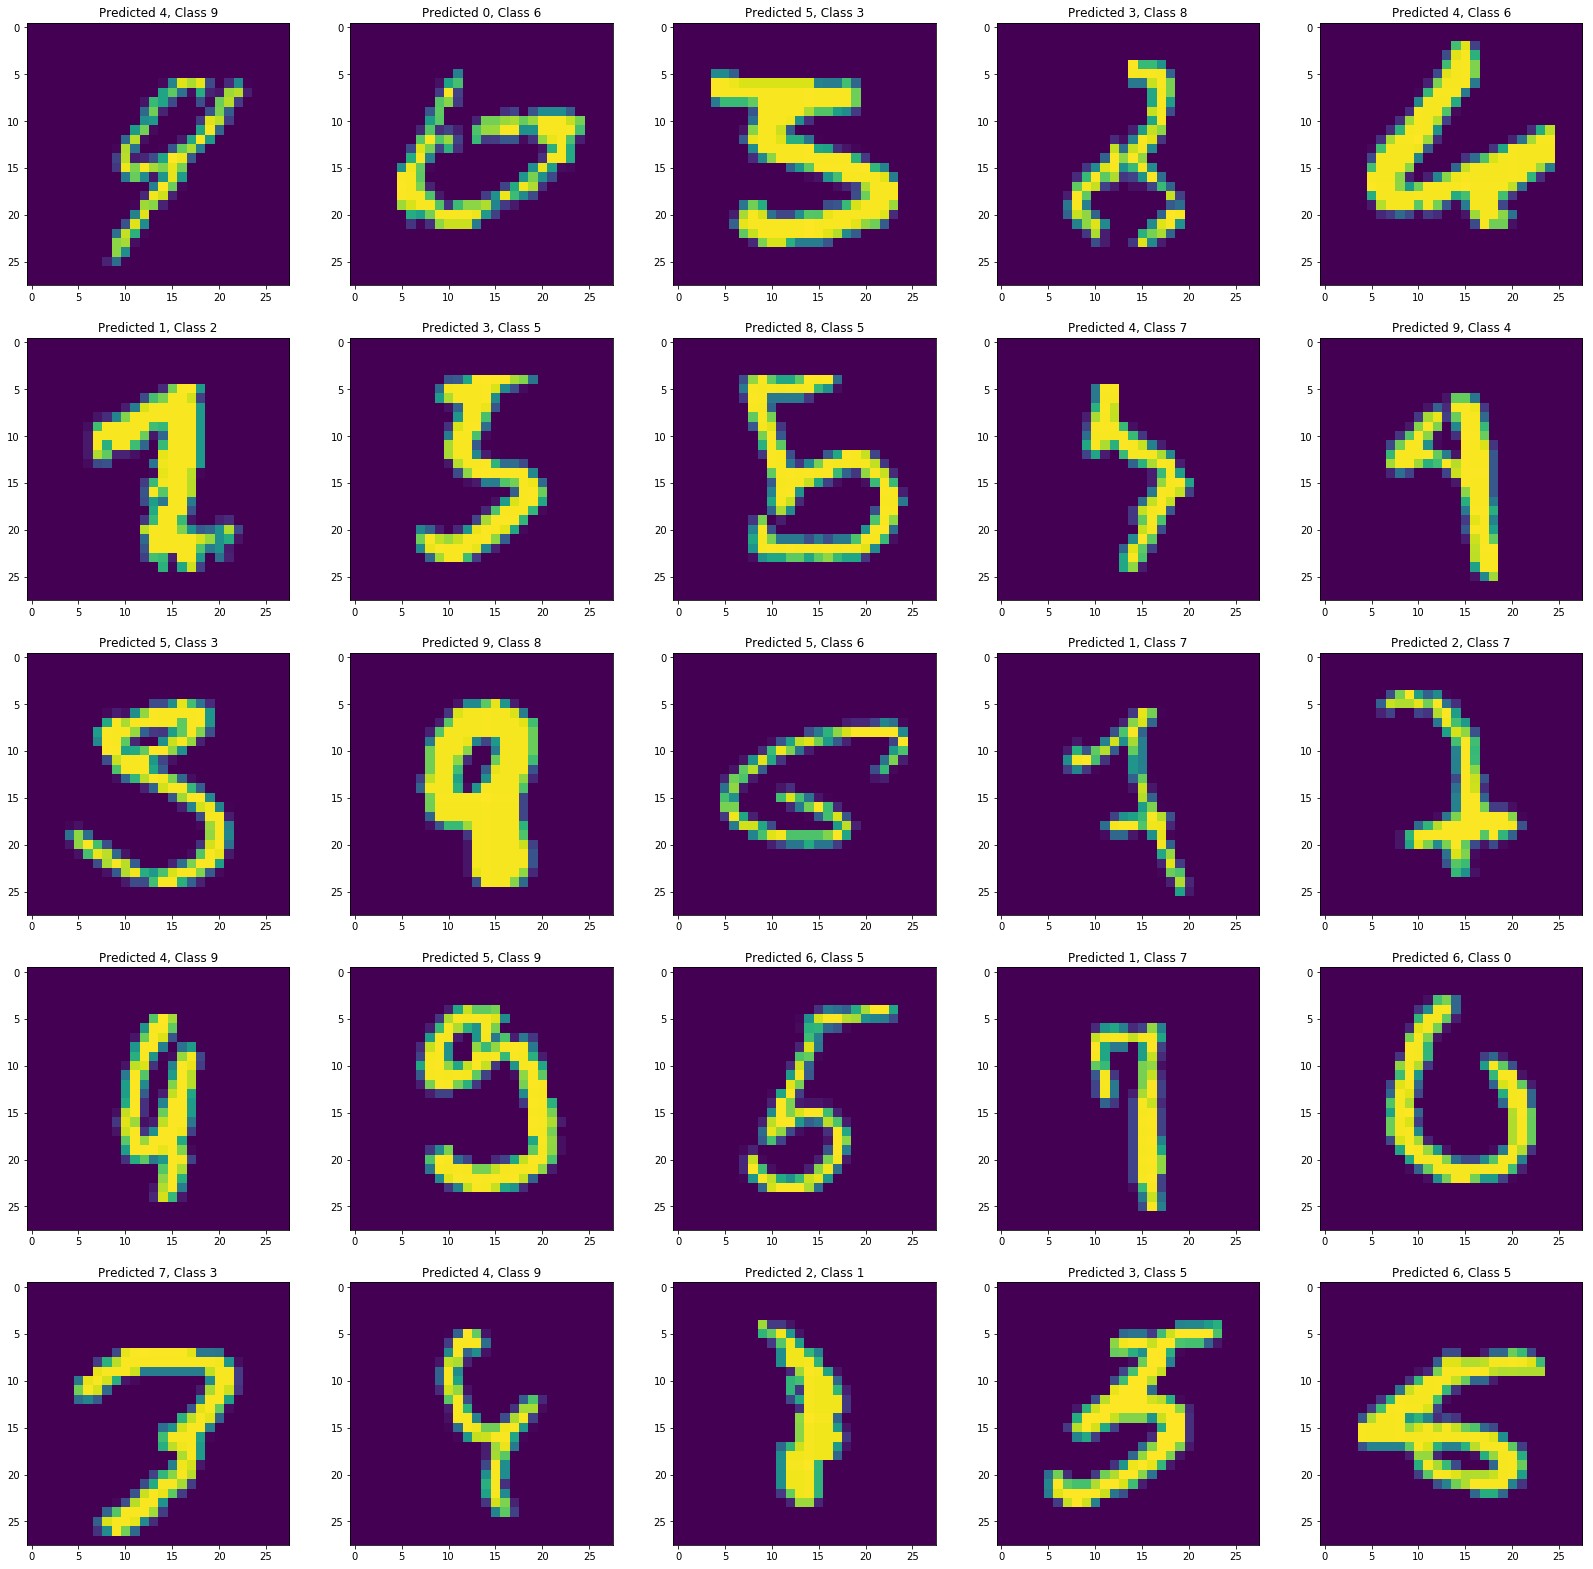

In [63]:
incorrect = np.where(y_pred!=y_test)[0]
fig=plt.figure(figsize=(28, 28))
columns = 5
rows = 5
for i in range(1, 26):
 img_num = incorrect[i-1]
 img = X_test[img_num].reshape(28,28)
 fig.add_subplot(rows, columns, i)
 plt.imshow(img)
 plt.title("Predicted {}, Class {}".format(y_pred[img_num], y_test[img_num]))
plt.show()